In [1]:
import numpy as np
from optimize.util import optimize
import regression as reg

model = (<function lin_test at 0x000002857119C3A0>, <function lin_jac at 0x000002857119C430>)
start =  [10. 10.]
function =  <function <lambda> at 0x00000285711A5AF0>
Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\linear\ada_grad.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11    105.3 MiB    105.3 MiB           1   @profile
    12                                         def ada_grad(x, y, start,
    13                                                      eps=1e-4, learning_rate=0.01, batch_size=1,
    14                                                      max_iter=100):
    15    105.3 MiB      0.0 MiB           1       trace = [start]
    16    105.3 MiB      0.0 MiB           1       iters = 0
    17    105.3 MiB      0.0 MiB           1       start_time = time.time()
    18                                         
    19    105.3 MiB      0.0 MiB           1       dim = len(start)
    20    105.3 MiB      0.0 MiB           1       

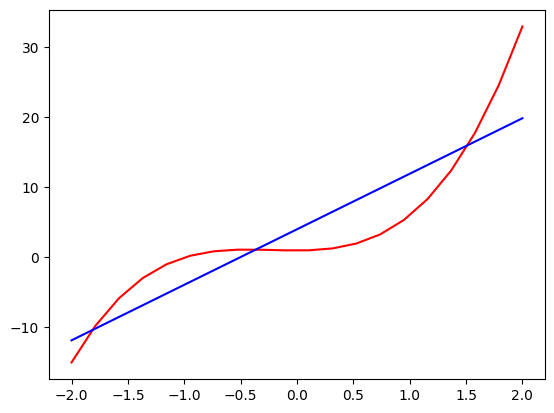

In [2]:
import tests as tests
import util

input = [tests.create_test(func=lambda x: util.polynomial(5)(x)(np.array([1., 0., 2., 3., 0.])),
                           model_name='lin',
                           point=np.array([10.,  10.]),
                           params=2,
                           begin=-2,
                           end=2,
                           steps=20
                           )]

iter = 0
for test in input:
    print("model =", test.model)
    print("start = ", test.init_point)
    print("function = ", test.func)
    
    func, jac = test.model
    task = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADA-GRAD')
    
    betta, info = task(test.X, test.Y, test.init_point, 1e-4, 1, 10, 1000)
    
    X = np.linspace(test.begin, test.end, test.steps)
    Y = func(X)(betta)
    
    util.show(test.X, test.Y, X, Y)
    
    iter += 1

In [3]:
betta

array([7.93225693, 4.02698576])